# Subset and plot CMIP data using Xarray

In this notebook:

* Launch Jupyter Notebook 
* Subsetting
* Xarray.plot( )
    
---------


#### Import the xarray and netCDF modules

In [1]:
import xarray as xr
import netCDF4 as nc
%matplotlib inline

#### Local path on /g/data

See CMIP5 and CMIP6 data file examples as below. We will use CMIP6 in the following demonstration. 

In [26]:
path_CMIP5 = '/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/\
Amon/r1i1p1/v20130325/tasmax/tasmax_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc'
path_CMIP6 = '/g/data/oi10/replicas/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/\
day/tas/gn/v20191115/tas_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn_20000101-20141231.nc'

#### OPeNDAP Data URL

For more information on where to find OPeNDAP URL's, see:
<a href="https://nbviewer.jupyter.org/github/nci-training/readthedoc_NCI_data_training/blob/master/docs/_notebook/TDS/tds_OPeNDAP_cmip5.ipynb">THREDDS Data Server: Data Access</a>


In [27]:
url = 'http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/\
Amon/r1i1p1/v20130325/tasmax/tasmax_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc'

Call a particular file by using any of the path or url point as above.

In [28]:
f1 = xr.open_dataset(path_CMIP6) 

### Subsettting

There are multiple ways to select subsets of the data using xarray. 

#### 1. Using the regular numpy method of indexing:

In [29]:
tas = f1.tas
tas[1:10,:,0].values

array([[244.25504, 244.11143, 244.8654 , ..., 252.2028 , 254.80562,
        257.209  ],
       [244.99164, 243.70279, 245.47511, ..., 245.54207, 252.54214,
        263.12976],
       [245.20886, 246.62997, 248.23387, ..., 236.42502, 240.74495,
        246.46326],
       ...,
       [243.7399 , 244.93011, 245.98024, ..., 247.88094, 244.78683,
        243.57555],
       [243.68779, 244.94746, 246.24438, ..., 246.65918, 245.2913 ,
        243.84929],
       [243.47762, 243.73996, 244.91243, ..., 243.9751 , 244.74416,
        245.01816]], dtype=float32)

But in the above it is not as simple to know *where* the values selected have come from. xarray.sel() permits label based indexing.

#### 2. Using .sel( ) for label based indexing

In the case below we find the values of tas at latitude of -12.46 and longitude at 130.85 degrees - approximately Darwin. This is done using the `.sel()` method which can be performed on a Dataset or DataArray. This method permits selection based on coordinates rather than indices. 

However, it is unlikely there is a specific lat/lon coordinate value at those exact locations. For example, look at the available values of longitude:

In [30]:
f1.lon

<xarray.DataArray 'lon' (lon: 192)>
array([  0.   ,   1.875,   3.75 ,   5.625,   7.5  ,   9.375,  11.25 ,  13.125,
        15.   ,  16.875,  18.75 ,  20.625,  22.5  ,  24.375,  26.25 ,  28.125,
        30.   ,  31.875,  33.75 ,  35.625,  37.5  ,  39.375,  41.25 ,  43.125,
        45.   ,  46.875,  48.75 ,  50.625,  52.5  ,  54.375,  56.25 ,  58.125,
        60.   ,  61.875,  63.75 ,  65.625,  67.5  ,  69.375,  71.25 ,  73.125,
        75.   ,  76.875,  78.75 ,  80.625,  82.5  ,  84.375,  86.25 ,  88.125,
        90.   ,  91.875,  93.75 ,  95.625,  97.5  ,  99.375, 101.25 , 103.125,
       105.   , 106.875, 108.75 , 110.625, 112.5  , 114.375, 116.25 , 118.125,
       120.   , 121.875, 123.75 , 125.625, 127.5  , 129.375, 131.25 , 133.125,
       135.   , 136.875, 138.75 , 140.625, 142.5  , 144.375, 146.25 , 148.125,
       150.   , 151.875, 153.75 , 155.625, 157.5  , 159.375, 161.25 , 163.125,
       165.   , 166.875, 168.75 , 170.625, 172.5  , 174.375, 176.25 , 178.125,
       180.   , 181.875, 183.75 , 185.625, 187.5  , 189.375, 191.25 , 193.125,
       195.   , 196.875, 198.75 , 200.625, 202.5  , 204.375, 206.25 , 208.125,
       210.   , 211.875, 213.75 , 215.625, 217.5  , 219.375, 221.25 , 223.125,
       225.   , 226.875, 228.75 , 230.625, 232.5  , 234.375, 236.25 , 238.125,
       240.   , 241.875, 243.75 , 245.625, 247.5  , 249.375, 251.25 , 253.125,
       255.   , 256.875, 258.75 , 260.625, 262.5  , 264.375, 266.25 , 268.125,
       270.   , 271.875, 273.75 , 275.625, 277.5  , 279.375, 281.25 , 283.125,
       285.   , 286.875, 288.75 , 290.625, 292.5  , 294.375, 296.25 , 298.125,
       300.   , 301.875, 303.75 , 305.625, 307.5  , 309.375, 311.25 , 313.125,
       315.   , 316.875, 318.75 , 320.625, 322.5  , 324.375, 326.25 , 328.125,
       330.   , 331.875, 333.75 , 335.625, 337.5  , 339.375, 341.25 , 343.125,
       345.   , 346.875, 348.75 , 350.625, 352.5  , 354.375, 356.25 , 358.125])
Coordinates:
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    bounds:         lon_bnds
    units:          degrees_east
    axis:           X
    long_name:      Longitude
    standard_name:  longitude

There is no longitude value at 130.85 deg E, thus if we wanted to find the tas over Darwin, we need to use interpolation. This is done by adding an argument to the `.sel()` command and in this case we are going to use the nearest neighbour method.

In [31]:
tas.sel(lon=130.85,lat=-12.46,method='nearest')

<xarray.DataArray 'tas' (time: 5479)>
array([306.54373, 305.71402, 306.3294 , ..., 302.63876, 305.06888, 304.9428 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T12:00:00 ... 2014-12-31T12:00:00
    lat      float64 -12.5
    lon      float64 131.2
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-15T17:42:13Z altered by CMOR: Treated scalar dime...

### Subsetting in Time 
Notice that the time variable has also been automatically decoded by xarray to represent dates rather than floats

In [32]:
f1.time

<xarray.DataArray 'time' (time: 5479)>
array(['2000-01-01T12:00:00.000000000', '2000-01-02T12:00:00.000000000',
       '2000-01-03T12:00:00.000000000', ..., '2014-12-29T12:00:00.000000000',
       '2014-12-30T12:00:00.000000000', '2014-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T12:00:00 ... 2014-12-31T12:00:00
    height   float64 ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

Compared to the original numpy data:

In [33]:
ft = xr.open_dataset(path_CMIP6, decode_times=False)
ft.time

<xarray.DataArray 'time' (time: 5479)>
array([54786.5, 54787.5, 54788.5, ..., 60262.5, 60263.5, 60264.5])
Coordinates:
  * time     (time) float64 5.479e+04 5.479e+04 ... 6.026e+04 6.026e+04
    height   float64 ...
Attributes:
    bounds:         time_bnds
    units:          days since 1850-01-01
    calendar:       proleptic_gregorian
    axis:           T
    long_name:      time
    standard_name:  time

This decoding is very helpful in quickly selecting data over specific time periods.

### Exercise

Using the `.sel` method shown above. Find the tasmax values during the year 2005. What are the dimensions of tasmax in this case?

<a href="#ans1" data-toggle="collapse">Answer</a>
<div class="collapse" id="ans1">
<pre><code>
tas.sel(time='2005')
</code></pre>
</div>

### Selecting data within a range of values

In the above examples we found the tasmax values at a nearest lat/lon location, and a specific time. To select data over a range of values you can use the `slice()` function under the `sel()` command.

In the below case we are getting the subset of tasmax data from years 2000 to 2005 and between latitudes 20S to 20N.

In [34]:
subset = tas.sel(time=slice('2000','2005'),lat=slice(-20,20))
subset

<xarray.DataArray 'tas' (time: 2192, lat: 33, lon: 192)>
[13888512 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01T12:00:00 ... 2005-12-31T12:00:00
  * lat      (lat) float64 -20.0 -18.75 -17.5 -16.25 ... 16.25 17.5 18.75 20.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-15T17:42:13Z altered by CMOR: Treated scalar dime...

### Exercise
Find the tasmax values over Australia, between latitudes -45 to -10 deg N and longitudes of 110 to 155 deg E and during the years from 1990 to 2000.

### Xarray .plot()

Plotting with xarray is very simple. Xarray plots will automatically define the axes values and labels based on the information contained within the data array.

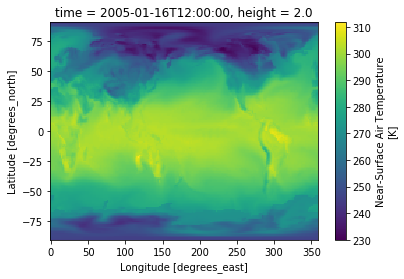

In [35]:
tas.sel(time='2005-01-16',method='nearest').plot()

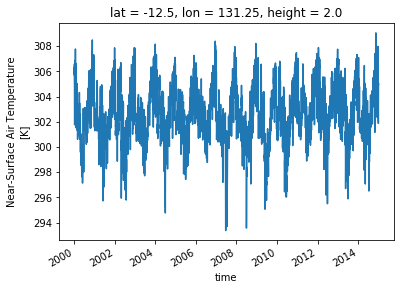

In [36]:
tas.sel(lon=130.85,lat=-12.46,method='nearest').plot()

### Exercise

Try plotting the colormap of tasmax in the region over Australia. So that is between latitudes -45 to -10 deg N of and longitudes of 110 to 155 deg E. Pick the date for the year and month you were born and plot for that.